/home/jtan/imgcap-subangkar/exp3_siamese
Image resolution:  (375, 500, 3) flickr8k_images


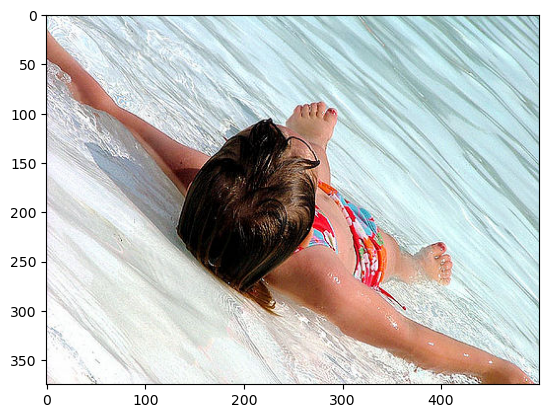

Image resolution:  (37, 50, 3) R0.1S1


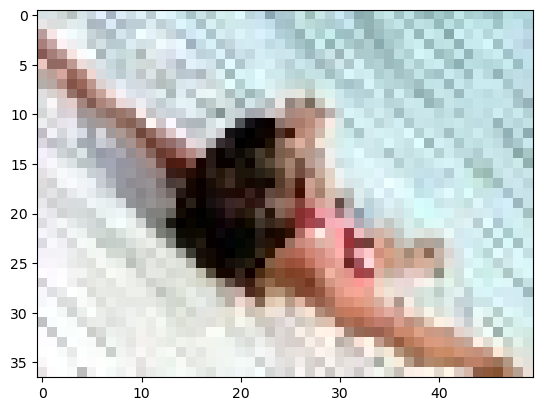

Image resolution:  (37, 50, 3) R0.1S50


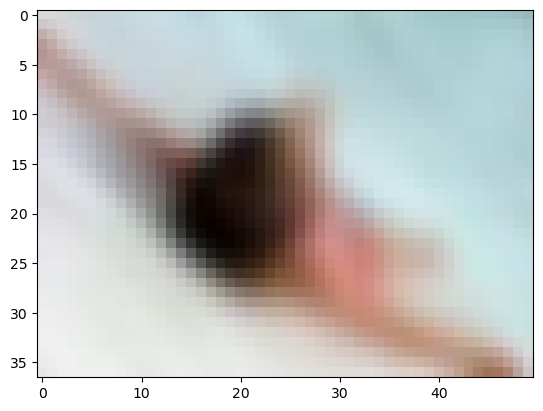

Image resolution:  (75, 100, 3) R0.2S1


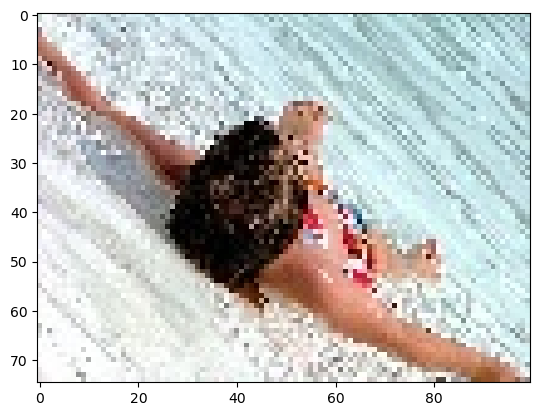

Image resolution:  (75, 100, 3) R0.2S50


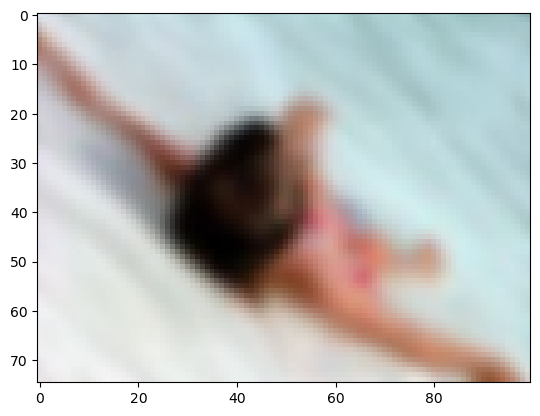

Image resolution:  (187, 250, 3) R0.5S1


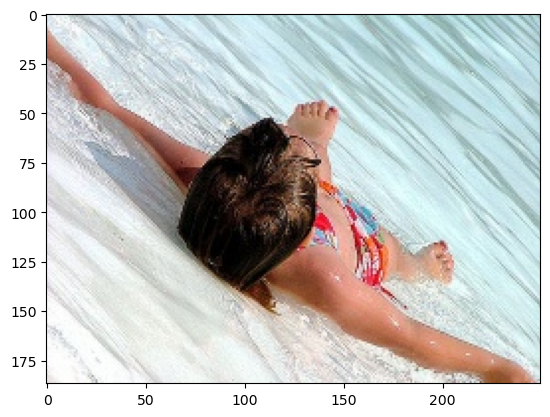

Image resolution:  (187, 250, 3) R0.5S50


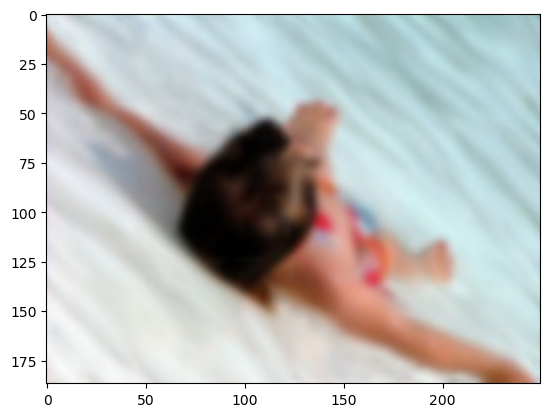

Image resolution:  (18, 25, 3) R0.05S50


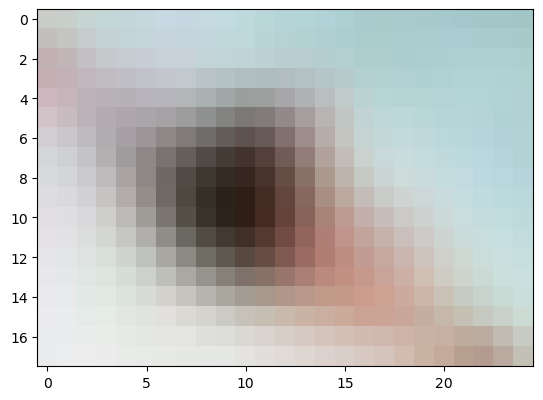

Image resolution:  (187, 250, 3) R0.5S1_GF500


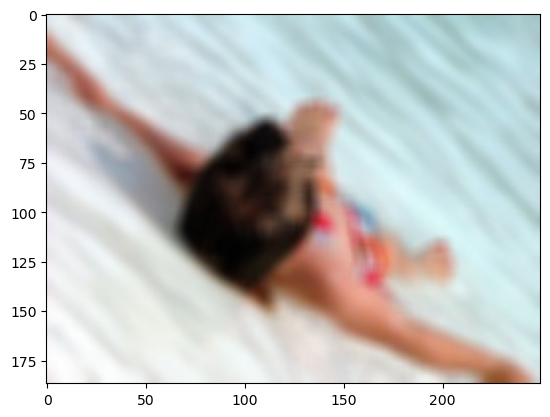

Image resolution:  (375, 500, 3) R1S1_GF500


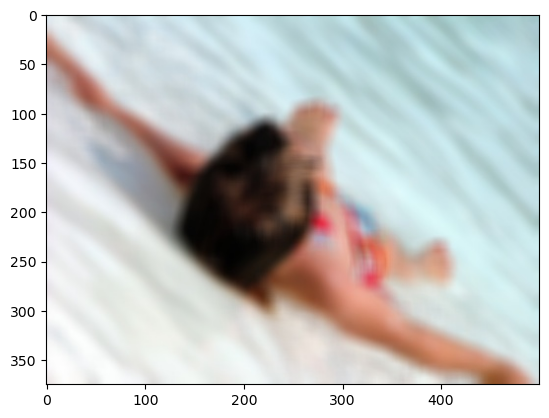

In [1]:
path = ['flickr8k_images', 'R0.1S1', 'R0.1S50', 'R0.2S1', 'R0.2S50', 'R0.5S1', 'R0.5S50', 'R0.05S50', 'R0.5S1_GF500','R1S1_GF500']

# there is an images abc in above folder, open and display
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

print(os.getcwd())
for p in path:
    # print image resolution
    img = cv2.imread(f'../datasets/flickr8k/{p}/667626_18933d713e.jpg')
    print("Image resolution: ", img.shape,p)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

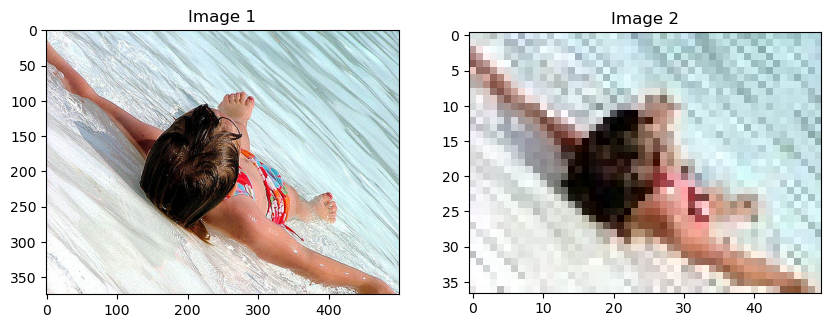

Using cache found in /home/jtan/.cache/torch/hub/pytorch_vision_v0.6.0


Pairwise distance: 0.20019854605197906


In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from siamese.SiameseNetwork import Encoder
from torchvision import transforms
from PIL import Image
import numpy as np

# Define image transformations
eval_transformations = transforms.Compose([
    transforms.Resize(256),  # resize shorter side to 256
    transforms.CenterCrop(224),  # center crop to 224x224
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # normalize
])

# Define image paths
path = ['flickr8k_images', 'R0.1S1', 'R0.1S50', 'R0.2S1', 'R0.2S50', 'R0.5S1', 'R0.5S50', 'R0.05S50', 'R0.5S1_GF500','R1S1_GF500']
image_path1 = f'../datasets/flickr8k/{path[0]}/667626_18933d713e.jpg'
image_path2 = f'../datasets/flickr8k/{path[1]}/667626_18933d713e.jpg'

# Load images using PIL
img1 = Image.open(image_path1).convert('RGB')
img2 = Image.open(image_path2).convert('RGB')

# Apply transformations
img1 = eval_transformations(img1).unsqueeze(0)  # add batch dimension
img2 = eval_transformations(img2).unsqueeze(0)  # add batch dimension

# Display images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.array(Image.open(image_path1)))
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(np.array(Image.open(image_path2)))
plt.title('Image 2')
plt.show()

# Load encoder model
encoder = Encoder(embed_size=50)
state = torch.load('./siamese/saved/resnet50_siamese_best_val_loss_pn.pt', map_location='cpu')
encoder.load_state_dict(state['state_dict'])
encoder.eval()  # set model to evaluation mode

# Ensure images are on the same device as model
device = torch.device('cpu')  # change to 'cuda' if using GPU
img1 = img1.to(device)
img2 = img2.to(device)
encoder = encoder.to(device)

# Get embeddings
with torch.no_grad():  # disable gradient computation for evaluation
    output1 = encoder(img1)
    output2 = encoder(img2)

# Compute pairwise distance
distance = nn.functional.pairwise_distance(output1, output2)
print('Pairwise distance:', distance.item())


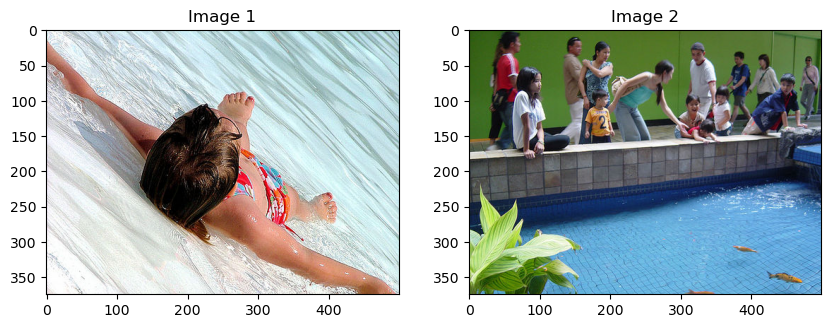

Using cache found in /home/jtan/.cache/torch/hub/pytorch_vision_v0.6.0


Pairwise distance: 0.4354200065135956


In [19]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from siamese.SiameseNetwork import Encoder
from torchvision import transforms
from PIL import Image
import numpy as np

# Define image transformations
eval_transformations = transforms.Compose([
    transforms.Resize(256),  # resize shorter side to 256
    transforms.CenterCrop(224),  # center crop to 224x224
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # normalize
])

# Define image paths
path = ['flickr8k_images', 'R0.1S1', 'R0.1S50', 'R0.2S1', 'R0.2S50', 'R0.5S1', 'R0.5S50', 'R0.05S50', 'R0.5S1_GF500','R1S1_GF500']
image_path1 = f'../datasets/flickr8k/{path[0]}/667626_18933d713e.jpg'
image_path2 = f'../datasets/flickr8k/{path[0]}/12830823_87d2654e31.jpg'

# Load images using PIL
img1 = Image.open(image_path1).convert('RGB')
img2 = Image.open(image_path2).convert('RGB')

# Apply transformations
img1 = eval_transformations(img1).unsqueeze(0)  # add batch dimension
img2 = eval_transformations(img2).unsqueeze(0)  # add batch dimension

# Display images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.array(Image.open(image_path1)))
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(np.array(Image.open(image_path2)))
plt.title('Image 2')
plt.show()

# Load encoder model
encoder = Encoder(embed_size=50)
state = torch.load('./siamese/saved/resnet50_siamese_best_val_loss_pn.pt', map_location='cpu')
encoder.load_state_dict(state['state_dict'])
encoder.eval()  # set model to evaluation mode

# Ensure images are on the same device as model
device = torch.device('cpu')  # change to 'cuda' if using GPU
img1 = img1.to(device)
img2 = img2.to(device)
encoder = encoder.to(device)

# Get embeddings
with torch.no_grad():  # disable gradient computation for evaluation
    output1 = encoder(img1)
    output2 = encoder(img2)

# Compute pairwise distance
distance = nn.functional.pairwise_distance(output1, output2)
print('Pairwise distance:', distance.item())


Using cache found in /home/jtan/.cache/torch/hub/pytorch_vision_v0.6.0
/home/jtan/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jtan/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


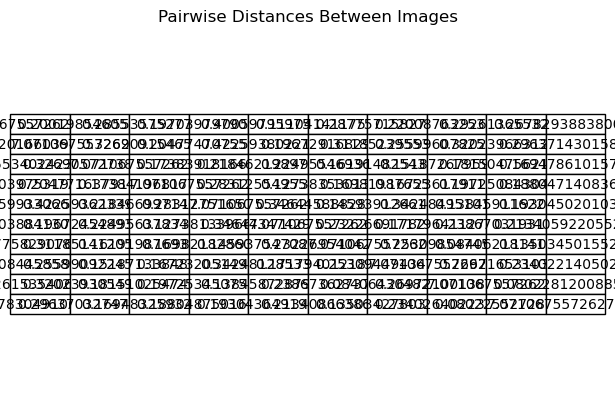

In [21]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from siamese.SiameseNetwork import Encoder
from torchvision import transforms
from PIL import Image
import numpy as np

# Define image transformations
eval_transformations = transforms.Compose([
    transforms.Resize(256),  # resize shorter side to 256
    transforms.CenterCrop(224),  # center crop to 224x224
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # normalize
])



path = ['flickr8k_images', 'R0.1S1', 'R0.1S50', 'R0.2S1', 'R0.2S50', 'R0.5S1', 'R0.5S50', 'R0.05S50', 'R0.5S1_GF500','R1S1_GF500']
paths = [f'../datasets/flickr8k/{p}/667626_18933d713e.jpg' for p in path]



# Load encoder model
encoder = Encoder(embed_size=50)
state = torch.load('./siamese/saved/resnet50_siamese_best_val_loss_pn.pt', map_location='cpu')
encoder.load_state_dict(state['state_dict'])
encoder.eval()  # set model to evaluation mode

# Load images using PIL and apply transformations
images = [eval_transformations(Image.open(img_path).convert('RGB')).unsqueeze(0) for img_path in paths]

# Ensure images are on the same device as model
device = torch.device('cpu')  # change to 'cuda' if using GPU
images = [img.to(device) for img in images]
encoder = encoder.to(device)

# Get embeddings
with torch.no_grad():  # disable gradient computation for evaluation
    embeddings = [encoder(img) for img in images]

# Compute pairwise distances and store in a matrix
num_images = len(images)
distance_matrix = np.zeros((num_images, num_images))

for i in range(num_images):
    for j in range(num_images):
        distance_matrix[i, j] = nn.functional.pairwise_distance(embeddings[i], embeddings[j]).item()

# Plot the distance matrix as a table
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=distance_matrix, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
ax.set_title('Pairwise Distances Between Images')
plt.show()


Using cache found in /home/jtan/.cache/torch/hub/pytorch_vision_v0.6.0
/home/jtan/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jtan/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


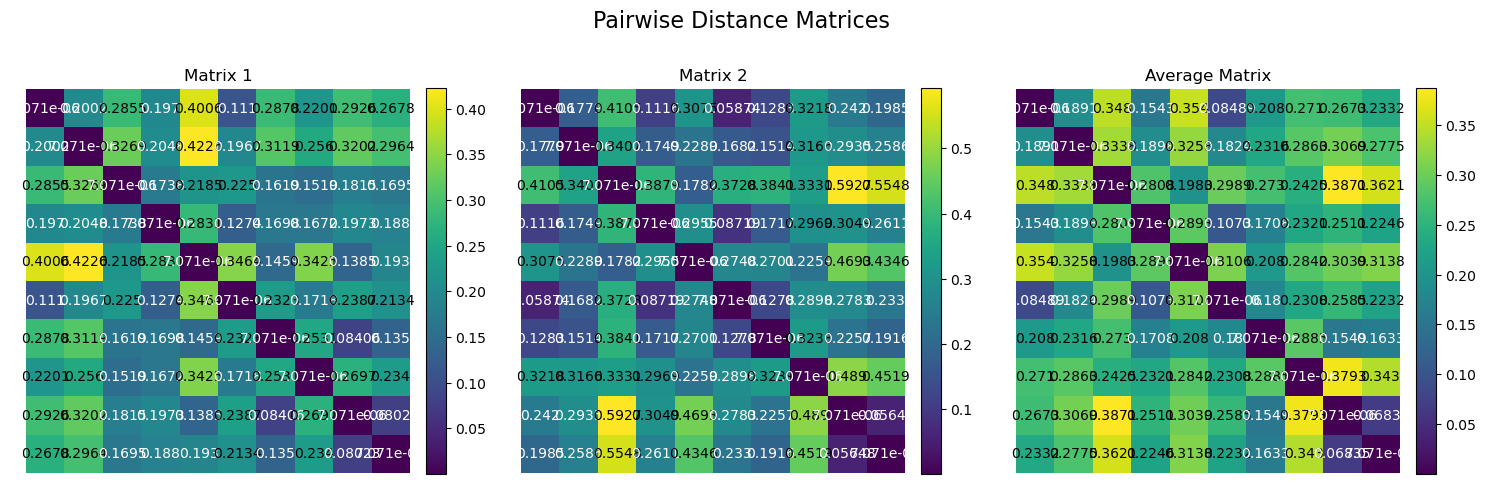

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from siamese.SiameseNetwork import Encoder
from torchvision import transforms
from PIL import Image
import numpy as np

# Define image transformations
eval_transformations = transforms.Compose([
    transforms.Resize(256),  # resize shorter side to 256
    transforms.CenterCrop(224),  # center crop to 224x224
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # normalize
])

types = ['flickr8k_images', 'R0.1S1', 'R0.1S50', 'R0.2S1', 'R0.2S50', 'R0.5S1', 'R0.5S50', 'R0.05S50', 'R0.5S1_GF500','R1S1_GF500']
path1 = [f'../datasets/flickr8k/{p}/667626_18933d713e.jpg' for p in types]
path2 = [f'../datasets/flickr8k/{p}/3637013_c675de7705.jpg' for p in types]
path3 = [f'../datasets/flickr8k/{p}/10815824_2997e03d76.jpg' for p in types]
path4 = [f'../datasets/flickr8k/{p}/12830823_87d2654e31.jpg' for p in types]
path5 = [f'../datasets/flickr8k/{p}/17273391_55cfc7d3d4.jpg' for p in types]

path1.append("../datasets/flickr8k/{p}/19212715_20476497a3.jpg")
path2.append("../datasets/flickr8k/{p}/19212715_20476497a3.jpg")
path3.append("../datasets/flickr8k/{p}/19212715_20476497a3.jpg")
path4.append("../datasets/flickr8k/{p}/19212715_20476497a3.jpg")
path5.append("../datasets/flickr8k/{p}/19212715_20476497a3.jpg"

# Define image paths
path_sets = [path1, path2, path3, path4, path5]

# Load encoder model
encoder = Encoder(embed_size=50)
state = torch.load('./siamese/saved/resnet50_siamese_best_val_loss_pn.pt', map_location='cpu')
encoder.load_state_dict(state['state_dict'])
encoder.eval()  # set model to evaluation mode

# Ensure model is on the correct device
device = torch.device('cpu')  # change to 'cuda' if using GPU
encoder = encoder.to(device)

# Function to compute distance matrix for a set of images
def compute_distance_matrix(image_paths):
    images = [eval_transformations(Image.open(img_path).convert('RGB')).unsqueeze(0) for img_path in image_paths]
    images = [img.to(device) for img in images]
    
    with torch.no_grad():  # disable gradient computation for evaluation
        embeddings = [encoder(img) for img in images]

    num_images = len(images)
    distance_matrix = np.zeros((num_images, num_images))
    
    for i in range(num_images):
        for j in range(num_images):
            distance_matrix[i, j] = nn.functional.pairwise_distance(embeddings[i], embeddings[j]).item()
    
    return distance_matrix

# Compute distance matrices for all sets
distance_matrices = [compute_distance_matrix(paths) for paths in path_sets]

# Compute the average distance matrix
average_distance_matrix = np.mean(distance_matrices, axis=0)

# Function to plot a distance matrix with color
def plot_distance_matrix(ax, matrix, title):
    cax = ax.imshow(matrix, cmap='viridis', interpolation='nearest')
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val:.4g}', ha='center', va='center', color='white' if val < np.max(matrix)/2 else 'black')
    ax.set_title(title)
    ax.axis('off')
    fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Plot all distance matrices and the average matrix
num_matrices = len(distance_matrices)
fig, axes = plt.subplots(1, num_matrices + 1, figsize=(15, 5))
fig.suptitle('Pairwise Distance Matrices', fontsize=16)

# Plot individual distance matrices
for idx, (ax, matrix) in enumerate(zip(axes, distance_matrices)):
    plot_distance_matrix(ax, matrix, f'Matrix {idx + 1}')

# Plot average distance matrix
plot_distance_matrix(axes[-1], average_distance_matrix, 'Average Matrix')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Using cache found in /home/jtan/.cache/torch/hub/pytorch_vision_v0.6.0
/home/jtan/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jtan/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


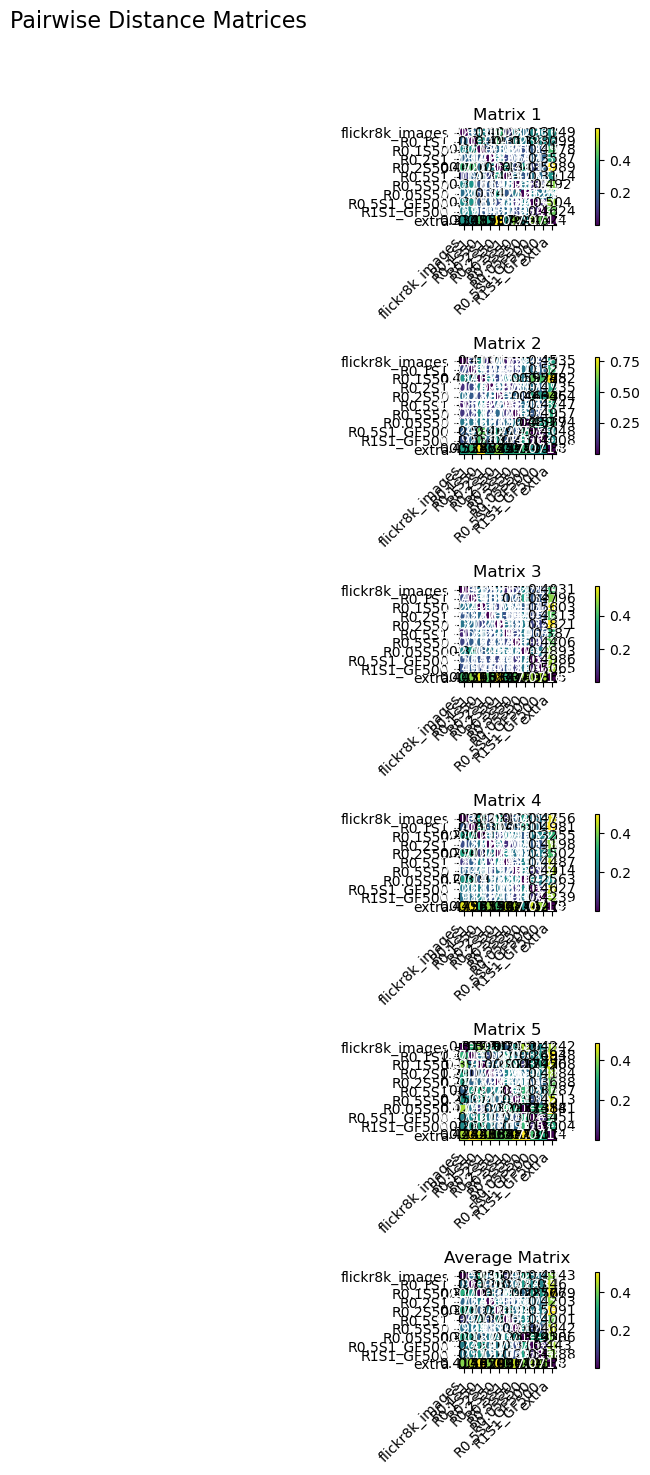

In [24]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from siamese.SiameseNetwork import Encoder
from torchvision import transforms
from PIL import Image
import numpy as np

# Define image transformations
eval_transformations = transforms.Compose([
    transforms.Resize(256),  # resize shorter side to 256
    transforms.CenterCrop(224),  # center crop to 224x224
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # normalize
])

types = ['flickr8k_images', 'R0.1S1', 'R0.1S50', 'R0.2S1', 'R0.2S50', 'R0.5S1', 'R0.5S50', 'R0.05S50', 'R0.5S1_GF500', 'R1S1_GF500']
base_path = '../datasets/flickr8k/'
image_filenames = ['667626_18933d713e.jpg', '3637013_c675de7705.jpg', '10815824_2997e03d76.jpg', '12830823_87d2654e31.jpg', '17273391_55cfc7d3d4.jpg']
extra_image = '19212715_20476497a3.jpg'

path_sets = [[f'{base_path}/{p}/{img}' for p in types] + [f'{base_path}/flickr8k_images/{extra_image}'] for img in image_filenames]

# Load encoder model
encoder = Encoder(embed_size=50)
encoder.eval()  # set model to evaluation mode

# Ensure model is on the correct device
device = torch.device('cpu')  # change to 'cuda' if using GPU
encoder = encoder.to(device)

# Function to compute distance matrix for a set of images
def compute_distance_matrix(image_paths):
    images = [eval_transformations(Image.open(img_path).convert('RGB')).unsqueeze(0) for img_path in image_paths]
    images = [img.to(device) for img in images]
    
    with torch.no_grad():  # disable gradient computation for evaluation
        embeddings = [encoder(img) for img in images]

    num_images = len(images)
    distance_matrix = np.zeros((num_images, num_images))
    
    for i in range(num_images):
        for j in range(num_images):
            distance_matrix[i, j] = nn.functional.pairwise_distance(embeddings[i], embeddings[j]).item()
    
    return distance_matrix

# Compute distance matrices for all sets
distance_matrices = [compute_distance_matrix(paths) for paths in path_sets]

# Compute the average distance matrix
average_distance_matrix = np.mean(distance_matrices, axis=0)

# Function to plot a distance matrix with color
def plot_distance_matrix(ax, matrix, title, labels):
    cax = ax.imshow(matrix, cmap='viridis', interpolation='nearest')
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val:.4g}', ha='center', va='center', color='white' if val < np.max(matrix)/2 else 'black')
    ax.set_title(title)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticklabels(labels)
    fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Plot all distance matrices and the average matrix
num_matrices = len(distance_matrices)
fig, axes = plt.subplots(num_matrices + 1, 1, figsize=(10, 15))
fig.suptitle('Pairwise Distance Matrices', fontsize=16)

# Plot individual distance matrices
for idx, (ax, matrix) in enumerate(zip(axes, distance_matrices)):
    plot_distance_matrix(ax, matrix, f'Matrix {idx + 1}', types + ['extra'])

# Plot average distance matrix
plot_distance_matrix(axes[-1], average_distance_matrix, 'Average Matrix', types + ['extra'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
images2, captions2, lengths2 = batch
        sort_ind = torch.argsort(lengths2, descending=True)
        images2 = images2[sort_ind]
        captions2 = captions2[sort_ind]
        lengths2 = lengths2[sort_ind]

        optimizer.zero_grad()
        outputs2 = model(images2, captions2, lengths2)
        targets2 = pack_padded_sequence(captions2, lengths=lengths2, batch_first=True, enforce_sorted=True)[0]
        loss2 = crossentrophy_loss(outputs2, targets2)